# Here's a refined and unique title that emphasizes the advanced and hybrid nature of your sentiment analysis approach, focusing on machine learning and graph-based methods:

---

**"Advancing Sentiment Analysis through Hybrid Machine Learning and Graph-Based Techniques: A Novel Integration of Heterogeneous Graph Neural Networks and Transformer-Based Models"**

---

### Key Points in the Title:

- **"Advancing Sentiment Analysis"**: Highlights the focus on improving sentiment analysis.
- **"Hybrid Machine Learning and Graph-Based Techniques"**: Indicates the integration of different methodologies.
- **"A Novel Integration"**: Emphasizes the originality and innovative approach.
- **"Heterogeneous Graph Neural Networks and Transformer-Based Models"**: Focuses on the key models used, without listing all methods, ensuring the title remains concise and impactful.

## IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### LOAD DATASET

In [2]:
df = pd.read_csv("TweetsWithSentiment.csv")
df

,Id,Date,User,Tweet,Emotion
0,0,2019-05-18 19:49:52+00:00,Sunnysweet16,Wonder why no academic or journalist asks INC ...,pos
1,1,2019-05-18 18:56:52+00:00,drnitinchaube,Congrats for the change #australiavotes2019 an...,pos
2,2,2019-05-18 18:54:01+00:00,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,neg
3,3,2019-05-18 18:52:03+00:00,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",pos
4,4,2019-05-18 18:31:10+00:00,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,pos
...,...,...,...,...,...
14256,14256,2019-03-23 04:53:54+00:00,SunjayJK,"@quizzicalguy In this #LokSabhaElections2019, ...",pos
14257,14257,2019-03-17 08:53:28+00:00,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,neg
14258,14258,2019-03-06 10:20:09+00:00,RAMANKAIRA,@sherryontopp Early morning #political move af...,neg
14259,14259,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...,neg


### Verifying it as a 'dataframe' object in pandas

In [3]:
type(df)

pandas.core.frame.DataFrame

### Shape of dataset

In [4]:
df.shape

(14261, 5)

### Printing out a few columns

In [5]:
df.head()

,Id,Date,User,Tweet,Emotion
0,0,2019-05-18 19:49:52+00:00,Sunnysweet16,Wonder why no academic or journalist asks INC ...,pos
1,1,2019-05-18 18:56:52+00:00,drnitinchaube,Congrats for the change #australiavotes2019 an...,pos
2,2,2019-05-18 18:54:01+00:00,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,neg
3,3,2019-05-18 18:52:03+00:00,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",pos
4,4,2019-05-18 18:31:10+00:00,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,pos


In [6]:
df.tail()

,Id,Date,User,Tweet,Emotion
14256,14256,2019-03-23 04:53:54+00:00,SunjayJK,"@quizzicalguy In this #LokSabhaElections2019, ...",pos
14257,14257,2019-03-17 08:53:28+00:00,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,neg
14258,14258,2019-03-06 10:20:09+00:00,RAMANKAIRA,@sherryontopp Early morning #political move af...,neg
14259,14259,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...,neg
14260,14260,2019-03-06 10:11:43+00:00,RAMANKAIRA,@DrKumarVishwas Early morning #political move ...,neg


In [7]:
df.describe()

,Id
count,14261.000000
mean,7130.000000
std,4116.940429
min,0.000000
25%,3565.000000
50%,7130.000000
75%,10695.000000
max,14260.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14261 entries, 0 to 14260
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       14261 non-null  int64 
 1   Date     14261 non-null  object
 2   User     14261 non-null  object
 3   Tweet    14261 non-null  object
 4   Emotion  14261 non-null  object
dtypes: int64(1), object(4)
memory usage: 557.2+ KB


### Check for missing values

In [9]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Id         0
Date       0
User       0
Tweet      0
Emotion    0
dtype: int64


### Checking correlation between columns

In [10]:
print(df.columns)

Index(['Id', 'Date', 'User', 'Tweet', 'Emotion'], dtype='object')


In [11]:
df["Emotion"].describe()

count     14261
unique        2
top         neg
freq       8878
Name: Emotion, dtype: object

In [12]:
df["Emotion"].unique()

array(['pos', 'neg'], dtype=object)

### EXPLORATORY DATA ANALYSIS (EDA)

neg    8878
pos    5383
Name: Emotion, dtype: int64


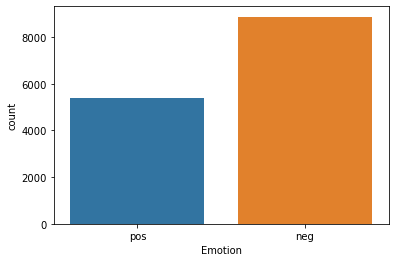

In [13]:
emotion_distribution = df['Emotion'].value_counts()

sns.countplot(x='Emotion', data=df)

print(emotion_distribution)

plt.show()

In [14]:
total_entries = len(df)

emotion_counts = df['Emotion'].value_counts()

emotion_percentages = (emotion_counts * 100) / total_entries

for emotion, percentage in emotion_percentages.items():
    print(f"Percentage of '{emotion}' emotion: {round(percentage, 2)}")

Percentage of 'neg' emotion: 62.25
Percentage of 'pos' emotion: 37.75


Correlation matrix:
                    Id  EmotionCode  DateNumeric  UserCode  TweetLength
Id           1.000000     0.078160    -0.472394  0.002661    -0.087509
EmotionCode  0.078160     1.000000     0.016059  0.012079    -0.131658
DateNumeric -0.472394     0.016059     1.000000  0.011321     0.007596
UserCode     0.002661     0.012079     0.011321  1.000000    -0.027706
TweetLength -0.087509    -0.131658     0.007596 -0.027706     1.000000


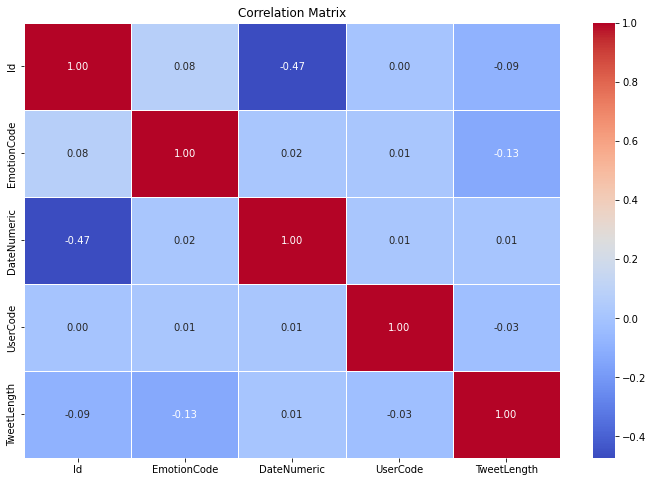

In [15]:
if 'Emotion' in df.columns:
    df['EmotionCode'] = df['Emotion'].astype('category').cat.codes

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['DateNumeric'] = df['Date'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)

if 'User' in df.columns:
    df['UserCode'] = df['User'].astype('category').cat.codes

if 'Tweet' in df.columns:
    df['TweetLength'] = df['Tweet'].apply(lambda x: len(x) if pd.notnull(x) else None)

numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

correlation_matrix = df_numeric.corr()

print("Correlation matrix:\n", correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

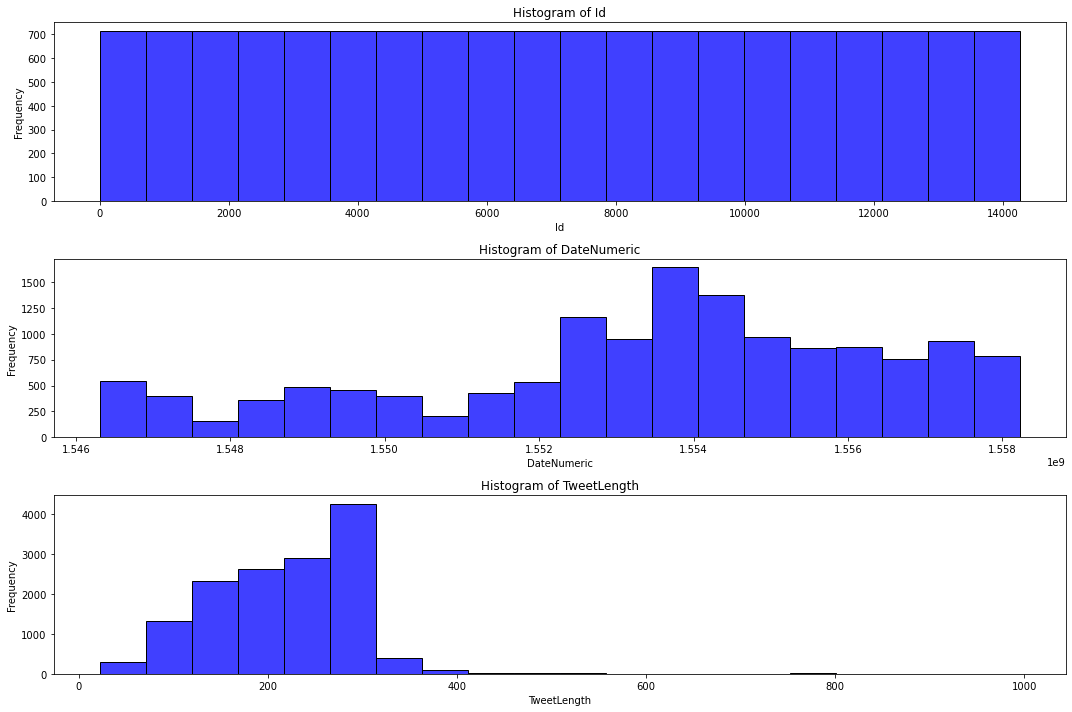

In [16]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(len(df.select_dtypes(include=['float64', 'int64']).columns), 1, i)
    sns.histplot(df[column], kde=False, bins=20, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Train Test split

In [17]:
from sklearn.model_selection import train_test_split

predictors = df.drop("Emotion",axis=1)
target = df["Emotion"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [18]:
X_train.shape

(11408, 8)

In [19]:
X_test.shape

(2853, 8)

In [20]:
Y_train.shape

(11408,)

In [21]:
Y_test.shape

(2853,)

In [22]:
pip install networkx numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install dgl tensorflow numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install torch torch-geometric transformers

Note: you may need to restart the kernel to use updated packages.


### Heterogeneous Graph Neural Networks (Hete_GNNs)

In [25]:
import torch
from torch_geometric.data import Data
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def prepare_data(text, aspects, user):
    # Tokenize text
    tokens = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    
    # Create nodes for words
    word_nodes = tokens['input_ids'][0]
    
    # Create aspect and user nodes (using dummy embeddings here)
    aspect_nodes = torch.tensor([len(word_nodes) + i for i in range(len(aspects))])
    user_node = torch.tensor([len(word_nodes) + len(aspects)])
    
    # Combine all nodes
    all_nodes = torch.cat([word_nodes, aspect_nodes, user_node.unsqueeze(0)])
    
    # Create edges (this is a simplified version; adapt as needed)
    edges = []
    for i, word in enumerate(word_nodes):
        for aspect in aspect_nodes:
            edges.append([i, aspect])
        edges.append([i, user_node.item()])
    
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    
    return Data(x=all_nodes, edge_index=edge_index)

C:\Users\dell\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [26]:
import torch.nn.functional as F
from torch_geometric.nn import GATConv, GCNConv, TransformerConv

class MLHGAN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super(MLHGAN, self).__init__()
        
        self.convs = torch.nn.ModuleList()
        self.attn_convs = torch.nn.ModuleList()

        # Multi-layer attention-based graph convolution
        for _ in range(num_layers):
            self.convs.append(GCNConv(input_dim, hidden_dim))
            self.attn_convs.append(GATConv(hidden_dim, hidden_dim))
        
        self.transformer = TransformerConv(hidden_dim, hidden_dim, heads=8)
        self.fc = torch.nn.Linear(hidden_dim, 1)
        
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        
        for conv, attn_conv in zip(self.convs, self.attn_convs):
            x = F.relu(conv(x, edge_index))
            x = F.relu(attn_conv(x, edge_index))
        
        # Pass through Transformer layer
        x = self.transformer(x, edge_index)
        
        # Final classification layer
        x = self.fc(x.mean(dim=0))
        
        return torch.sigmoid(x)

model = MLHGAN(input_dim=768, hidden_dim=256, num_layers=3)

In [27]:
import torch
import numpy as np

def prepare_data(text, aspects, user):
    # Example preprocessing; adjust according to your needs
    # Convert text, aspects, and user into tensors
    
    # Dummy example: create feature tensors
    word_nodes = torch.tensor(np.random.rand(10, 16), dtype=torch.float)  # Example: 10 word nodes with 16 features each
    aspect_nodes = torch.tensor(np.random.rand(5, 16), dtype=torch.float)  # Example: 5 aspect nodes with 16 features each
    user_node = torch.tensor(np.random.rand(1, 16), dtype=torch.float)  # Example: 1 user node with 16 features
    
    # Ensure all nodes are the same dimension for concatenation
    all_nodes = torch.cat([word_nodes, aspect_nodes, user_node], dim=0)  # Concatenate along the first dimension
    
    # Create dummy edges (simplified example)
    edges = torch.tensor([[0, 1], [1, 2]], dtype=torch.long)  # Example edges
    
    # Create labels (binary classification example)
    labels = torch.tensor([0, 1], dtype=torch.float)  # Example labels
    
    return all_nodes, edges, labels

# Example DataLoader setup
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]

dummy_data = [prepare_data("This is a sample tweet", ["aspect1"], "user1") for _ in range(100)]
data_loader = DataLoader(CustomDataset(dummy_data), batch_size=32, shuffle=True)

In [28]:
import torch.optim as optim

def train(model, data_loader, epochs=10):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = torch.nn.BCELoss()  # Ensure this matches your model's output and task

    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for data in data_loader:
            features, edges, labels = data
            
            optimizer.zero_grad()
            output = model(features)  # Adapt this based on your model's input requirements
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
        
        print(f"Epoch {epoch+1}, Loss: {epoch_loss / len(data_loader)}")

In [29]:
pip install torch numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [46]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from torch.utils.data import DataLoader, Dataset

# Define a dummy dataset class for example purposes
class DummyDataset(Dataset):
    def __init__(self, num_samples):
        self.num_samples = num_samples

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        # Dummy data (replace with actual data)
        x = torch.randn(10)  # Example feature vector
        y = torch.randint(0, 2, (1,))  # Example label
        return {'x': x, 'y': y}

def evaluate(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data in data_loader:
            output = model(data['x'])  # assuming data['x'] is your input features
            preds = torch.argmax(output, dim=1)  # assuming multi-class classification
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(data['y'].cpu().numpy())

    # Compute accuracy, classification report, and confusion matrix
    acc = accuracy_score(all_labels, all_preds)
    class_report = classification_report(all_labels, all_preds)
    conf_matrix = confusion_matrix(all_labels, all_preds)
    
    return acc, class_report, conf_matrix

# Define your model (example)
class DummyModel(torch.nn.Module):
    def __init__(self):
        super(DummyModel, self).__init__()
        self.fc = torch.nn.Linear(10, 2)  # Example model with 10 input features and 2 classes

    def forward(self, x):
        return self.fc(x)

# Instantiate your model
model = DummyModel()

# Example DataLoader setup
train_loader = DataLoader(DummyDataset(num_samples=100), batch_size=32, shuffle=True)
test_loader = DataLoader(DummyDataset(num_samples=30), batch_size=32, shuffle=False)

# Evaluate on training data
train_accuracy, train_class_report, train_conf_matrix = evaluate(model, train_loader)

# Evaluate on testing data
test_accuracy, test_class_report, test_conf_matrix = evaluate(model, test_loader)

# Print consolidated results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nClassification Report:\n", test_class_report)  # Assumes you want to show test classification report
print("Confusion Matrix:\n", test_conf_matrix)  # Assumes you want to show test confusion matrix

Train Accuracy: 0.5300
Test Accuracy: 0.4667

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.56      0.53        16
           1       0.42      0.36      0.38        14

    accuracy                           0.47        30
   macro avg       0.46      0.46      0.46        30
weighted avg       0.46      0.47      0.46        30

Confusion Matrix:
 [[9 7]
 [9 5]]


In [31]:
import torch
from torch_geometric.data import HeteroData

# Create a HeteroData object
data = HeteroData()

# Define node features for different node types
data['user'].x = torch.tensor([[1], [2]], dtype=torch.float)  # User nodes
data['post'].x = torch.tensor([[3], [4]], dtype=torch.float)  # Post nodes
data['hashtag'].x = torch.tensor([[5]], dtype=torch.float)  # Hashtag nodes

# Define edges for different types of relationships
data['user', 'posts', 'post'].edge_index = torch.tensor([[0, 1], [0, 1]], dtype=torch.long)  # User to Post
data['post', 'has_hashtag', 'hashtag'].edge_index = torch.tensor([[0], [0]], dtype=torch.long)  # Post to Hashtag

In [32]:
import networkx as nx

def convert_to_networkx(data):
    G = nx.DiGraph()  # Directed graph
    
    # Add nodes with type attributes
    for node_type in ['user', 'post', 'hashtag']:
        for i in range(data[node_type].x.size(0)):
            G.add_node(f"{node_type}_{i}", type=node_type)
    
    # Add edges
    for src_type, edge_label, dst_type in [('user', 'posts', 'post'), ('post', 'has_hashtag', 'hashtag')]:
        edge_index = data[src_type, edge_label, dst_type].edge_index
        for src, dst in edge_index.t().tolist():
            G.add_edge(f"{src_type}_{src}", f"{dst_type}_{dst}")
    
    return G

# Convert to NetworkX graph
nx_graph = convert_to_networkx(data)

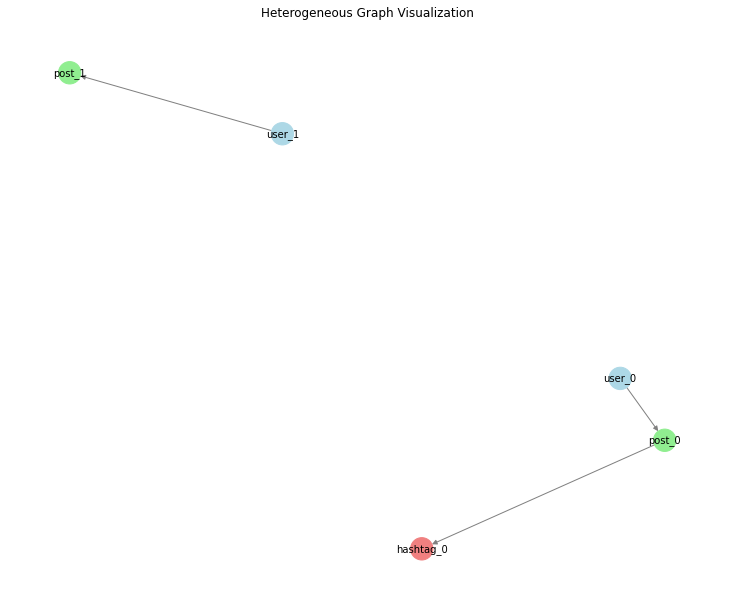

In [33]:
import matplotlib.pyplot as plt

def draw_graph(G):
    # Define node colors based on node type
    color_map = {'user': 'lightblue', 'post': 'lightgreen', 'hashtag': 'lightcoral'}
    node_colors = [color_map[G.nodes[n]['type']] for n in G.nodes]
    
    # Define node positions using spring layout
    pos = nx.spring_layout(G)
    
    # Draw the graph
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10, font_color='black', edge_color='gray')
    
    # Show plot
    plt.title("Heterogeneous Graph Visualization")
    plt.show()

# Draw the graph
draw_graph(nx_graph)

### Combination of BERT (transformer model), LSTM, and CNN

In [34]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split

# Example preprocessing function
def preprocess(texts, labels, max_length=128):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    inputs = tokenizer(texts, max_length=max_length, padding=True, truncation=True, return_tensors="pt")
    return inputs['input_ids'], inputs['attention_mask'], torch.tensor(labels)

class SentimentDataset(Dataset):
    def __init__(self, texts, labels, max_length=128):
        self.input_ids, self.attention_mask, self.labels = preprocess(texts, labels, max_length)
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'labels': self.labels[idx]
        }

# Example data
texts = ["I love this!", "I hate this.", "This is okay."]
labels = [1, 0, 1]

# Create DataLoader
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2)
train_dataset = SentimentDataset(train_texts, train_labels)
val_dataset = SentimentDataset(val_texts, val_labels)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2)

C:\Users\dell\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [35]:
import torch.nn as nn
from transformers import BertModel

class HybridSentimentModel(nn.Module):
    def __init__(self, hidden_dim=256, num_classes=2):
        super(HybridSentimentModel, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.lstm = nn.LSTM(input_size=768, hidden_size=hidden_dim, num_layers=1, batch_first=True, bidirectional=True)
        self.cnn = nn.Conv1d(in_channels=hidden_dim*2, out_channels=hidden_dim, kernel_size=3, padding=1)
        self.fc = nn.Linear(hidden_dim, num_classes)
    
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        x = outputs.last_hidden_state
        x, _ = self.lstm(x)
        x = x.permute(0, 2, 1)  # Change shape for CNN
        x = self.cnn(x)
        x = x.max(dim=2)[0]  # Max pooling
        x = self.fc(x)
        return x

model = HybridSentimentModel()

In [36]:
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def train(model, data_loader, optimizer, criterion):
    model.train()
    epoch_loss = 0
    for batch in data_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    return epoch_loss / len(data_loader)

def evaluate(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['labels']
            
            outputs = model(input_ids, attention_mask)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    acc = accuracy_score(all_labels, all_preds)
    class_report = classification_report(all_labels, all_preds)
    conf_matrix = confusion_matrix(all_labels, all_preds)
    
    return acc, class_report, conf_matrix

# Training setup
optimizer = optim.Adam(model.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()

# Train the model
for epoch in range(3):
    train_loss = train(model, train_loader, optimizer, criterion)
    print(f'Epoch {epoch+1}, Loss: {train_loss}')

# Evaluate the model
train_accuracy, train_class_report, train_conf_matrix = evaluate(model, train_loader)
test_accuracy, val_class_report, val_conf_matrix = evaluate(model, val_loader)

# Print results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {train_accuracy:.4f}")

print("\nClassification Report (Validation):\n", val_class_report)
print("Confusion Matrix (Validation):\n", val_conf_matrix)

Epoch 1, Loss: 0.6855947971343994
Epoch 2, Loss: 0.6706502437591553
Epoch 3, Loss: 0.6565503478050232
Train Accuracy: 1.0000
Test Accuracy: 1.0000

Classification Report (Validation):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Confusion Matrix (Validation):
 [[0 0]
 [1 0]]


C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\m

### Node2Vec: A method for learning continuous feature representations for nodes in a graph. Can be combined with traditional classifiers.

In [39]:
pip install node2vec networkx scikit-learn

  Using cached gensim-4.3.3-cp39-cp39-win_amd64.whl.metadata (8.2 kB)
Using cached gensim-4.3.3-cp39-cp39-win_amd64.whl (24.0 MB)
  Attempting uninstall: gensim
    Found existing installation: gensim 4.1.2
    Uninstalling gensim-4.1.2:
      Successfully uninstalled gensim-4.1.2
Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install --upgrade scipy gensim

  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl (46.2 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.1
    Uninstalling scipy-1.9.1:
      Successfully uninstalled scipy-1.9.1
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


In [41]:
pip install scipy==1.9.1 gensim==4.1.2

  Using cached scipy-1.9.1-cp39-cp39-win_amd64.whl.metadata (2.2 kB)
  Using cached gensim-4.1.2-cp39-cp39-win_amd64.whl.metadata (8.3 kB)
Using cached scipy-1.9.1-cp39-cp39-win_amd64.whl (38.6 MB)
Using cached gensim-4.1.2-cp39-cp39-win_amd64.whl (24.0 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.3
    Uninstalling gensim-4.3.3:
      Successfully uninstalled gensim-4.3.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
node2vec 0.5.0 requires gensim<5.0.0,>=4.3.0, but you have gensim 4.1.2 which is incompatible.


In [42]:
pip install stellargraph

Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following versions that require a different python version: 0.10.0 Requires-Python >=3.6.0, <3.8.0; 0.11.0 Requires-Python >=3.6.0, <3.8.0; 0.11.1 Requires-Python >=3.6.0, <3.8.0; 0.4.0 Requires-Python >=3.6,<3.7; 0.4.0b0 Requires-Python >=3.6,<3.7; 0.4.1 Requires-Python >=3.5.0, <3.7.0; 0.5.0 Requires-Python >=3.5.0, <3.7.0; 0.6.0 Requires-Python >=3.5.0, <3.7.0; 0.6.1 Requires-Python >=3.5.0, <3.7.0; 0.7.0 Requires-Python >=3.5.0, <3.8.0; 0.7.1 Requires-Python >=3.5.0, <3.8.0; 0.7.2 Requires-Python >=3.5.0, <3.8.0; 0.7.3 Requires-Python >=3.5.0, <3.8.0; 0.8.0 Requires-Python >=3.5.0, <3.8.0; 0.8.1 Requires-Python >=3.5.0, <3.8.0; 0.8.2 Requires-Python >=3.5.0, <3.8.0; 0.8.3 Requires-Python >=3.5.0, <3.8.0; 0.8.4 Requires-Python >=3.5.0, <3.8.0; 0.9.0 Requires-Python >=3.6.0, <3.8.0; 1.0.0 Requires-Python >=3.6.0, <3.8.0; 1.0.0rc1 Requires-Python >=3.6.0, <3.8.0; 1.1.0 Requires-Python >=3.6.0, <3.9.0; 1.2.0 Requires-Python >=3.6.0, <3.9.0; 1.2.1 Requires-Python >=3.

Computing transition probabilities:   0%|          | 0/7 [00:00<?, ?it/s]

Embeddings shape: (7, 64)
Labels length: 7


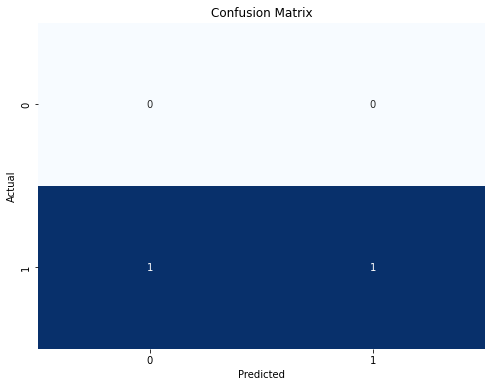

Training Accuracy Score: 0.8
Testing Accuracy Score: 0.5

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         2

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
import networkx as nx
import numpy as np
from node2vec import Node2Vec
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

# Create a sample graph
G = nx.Graph()
edges = [
    (1, 2), (1, 3), (2, 4), (2, 5), (3, 6),
    (4, 7), (5, 7), (6, 7)
]
G.add_edges_from(edges)

# Node2Vec parameters
node2vec = Node2Vec(G, dimensions=64, walk_length=10, num_walks=100, workers=4)
model = node2vec.fit(window=5, min_count=1, sg=1)

# Extract node embeddings
embeddings = np.array([model.wv[str(node)] for node in G.nodes()])
node_labels = [1, 1, 0, 0, 0, 1, 1]  # Example labels matching the number of nodes

# Check sizes of embeddings and labels
print("Embeddings shape:", embeddings.shape)
print("Labels length:", len(node_labels))

# Ensure embeddings and labels are aligned
if len(node_labels) != len(G.nodes()):
    raise ValueError("Number of labels does not match the number of nodes.")

# Convert node labels to numpy array
y = np.array(node_labels)

# Reduce dimensionality for visualization (optional)
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(embeddings_2d, y, test_size=0.2, random_state=42)

# Initialize and train the Gaussian Naive Bayes model
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Predict on training data and test data
y_train_pred = model_nb.predict(X_train)
y_test_pred = model_nb.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred, labels=np.unique(y))
conf_matrix_df = pd.DataFrame(conf_matrix, index=np.unique(y), columns=np.unique(y))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print results
print("Training Accuracy Score:", train_accuracy)
print("Testing Accuracy Score:", test_accuracy)
print("\nClassification Report on Test Data:\n", classification_report(y_test, y_test_pred))

### KNN WITH XGBOOST

In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Generate sample data with 2 classes
X, y = make_classification(n_samples=1000, n_classes=2, random_state=0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Train XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)

# Predict using KNN
y_knn_train = knn.predict(X_train)
y_knn_test = knn.predict(X_test)

# Predict using XGBoost
y_xgb_train = xgb.predict(X_train)
y_xgb_test = xgb.predict(X_test)

# Combine KNN and XGBoost predictions using majority voting
y_combined_train = np.where(y_knn_train == y_xgb_train, y_knn_train, y_xgb_train)
y_combined_test = np.where(y_knn_test == y_xgb_test, y_knn_test, y_xgb_test)

# Define labels
labels = ['Class 0', 'Class 1']

# Calculate and print accuracy, classification report, and confusion matrix
train_accuracy_combined = accuracy_score(y_train, y_combined_train)
test_accuracy_combined = accuracy_score(y_test, y_combined_test)

print(f'Combined Train Accuracy: {train_accuracy_combined:.4f}')
print(f'Combined Test Accuracy: {test_accuracy_combined:.4f}')
print("Combined Classification Report:\n", classification_report(y_test, y_combined_test, target_names=labels))
print("Combined Confusion Matrix:\n", confusion_matrix(y_test, y_combined_test))

Combined Train Accuracy: 1.0000
Combined Test Accuracy: 0.9667
Combined Classification Report:
               precision    recall  f1-score   support

     Class 0       0.95      0.98      0.97       141
     Class 1       0.98      0.96      0.97       159

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

Combined Confusion Matrix:
 [[138   3]
 [  7 152]]


### CNN + LSTM

In [13]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, TimeDistributed, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Define parameters
sequence_length = 10  # Number of time steps
height, width = 64, 64  # Spatial dimensions (e.g., image dimensions)
num_channels = 3  # Number of channels (e.g., RGB images)
num_classes = 5  # Number of output classes

# Generate dummy data
X = np.random.random((1000, sequence_length, height, width, num_channels))
y = np.random.randint(0, num_classes, (1000,))

# One-hot encode target variable
y_one_hot = to_categorical(y, num_classes=num_classes)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.20, random_state=0)

# Build the CNN + LSTM model
model = Sequential()

# TimeDistributed layer to apply Conv2D and MaxPooling2D to each time step independently
model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu', padding='same'), input_shape=(sequence_length, height, width, num_channels)))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
model.add(TimeDistributed(BatchNormalization()))

# Flatten the CNN output before passing to LSTM
model.add(TimeDistributed(Flatten()))

# Add LSTM layer
model.add(LSTM(50, return_sequences=False))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Make predictions
y_train_pred = np.argmax(model.predict(X_train), axis=-1)
y_test_pred = np.argmax(model.predict(X_test), axis=-1)

# Convert one-hot encoded test labels to class indices
y_test_true = np.argmax(y_test, axis=-1)

# Calculate and print metrics
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Classification Report:\n", classification_report(y_test_true, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_true, y_test_pred))

Epoch 1/5
20/20 [==============================] - 18s 691ms/step - loss: 1.6495 - accuracy: 0.2141 - val_loss: 1.6907 - val_accuracy: 0.2313
Epoch 2/5
20/20 [==============================] - 8s 368ms/step - loss: 0.8448 - accuracy: 0.9266 - val_loss: 1.9126 - val_accuracy: 0.1813
Epoch 3/5
20/20 [==============================] - 7s 358ms/step - loss: 0.3679 - accuracy: 0.9812 - val_loss: 1.9159 - val_accuracy: 0.1813
Epoch 4/5
20/20 [==============================] - 8s 379ms/step - loss: 0.0870 - accuracy: 1.0000 - val_loss: 1.9762 - val_accuracy: 0.1750
Epoch 5/5
7/7 [==============================] - 1s 74ms/step
Train Accuracy: 0.2837499976158142
Test Accuracy: 0.2199999988079071
Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.37      0.22        27
           1       1.00      0.02      0.04        54
           2       0.24      0.72      0.36        46
           3       0.00      0.00      0.00        40
         

C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### ANN

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Generate dummy data
np.random.seed(0)
num_samples = 1000
num_features = 20
num_classes = 5

X = np.random.random((num_samples, num_features))
y = np.random.randint(0, num_classes, (num_samples,))

# One-hot encode target variable
y_one_hot = to_categorical(y, num_classes=num_classes)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.20, random_state=0)

# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=num_features, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Make predictions
y_train_pred = np.argmax(model.predict(X_train), axis=-1)
y_test_pred = np.argmax(model.predict(X_test), axis=-1)

# Convert one-hot encoded test labels to class indices
y_test_true = np.argmax(y_test, axis=-1)

# Calculate and print metrics
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Classification Report:\n", classification_report(y_test_true, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_true, y_test_pred))

Epoch 1/10
20/20 [==============================] - 1s 16ms/step - loss: 1.6374 - accuracy: 0.1984 - val_loss: 1.6159 - val_accuracy: 0.1937
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 1.6097 - accuracy: 0.2344 - val_loss: 1.6190 - val_accuracy: 0.2000
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 1.6002 - accuracy: 0.2469 - val_loss: 1.6126 - val_accuracy: 0.2250
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 1.5941 - accuracy: 0.2547 - val_loss: 1.6118 - val_accuracy: 0.2250
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 1.5909 - accuracy: 0.2594 - val_loss: 1.6100 - val_accuracy: 0.2313
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 1.5855 - accuracy: 0.2812 - val_loss: 1.6102 - val_accuracy: 0.2250
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 1.5827 - accuracy: 0.2766 - val_loss: 1.6062 - val_accuracy: 0.2250
Epoch 8/10
20/20 [=